In [1]:
import tensorflow as tf
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt

2022-02-21 16:59:29.360624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-21 16:59:29.360666: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
square = models.Sequential()
#n_zernike = 8
#n_actuators = 51
square.add(layers.Dense(1, activation='linear', input_shape=[1]))
square.add(layers.Dense(1024, activation='relu', kernel_initializer='normal'))
square.add(layers.Dense(1024, activation='relu', kernel_initializer='normal'))
square.add(layers.Dense(1, activation='linear'))
square.compile(loss="mse", optimizer='adam')

In [25]:
x = np.linspace(0.1, 5, 20000).reshape(-1, 1)
f = lambda x: np.sin(np.pi*x)/(np.pi*x)
y = f(x)
print(np.min(x), np.max(x))

0.1 5.0


In [26]:
hist = square.fit(x, y, batch_size=10, epochs=1)

2000/2000 [==============================] - 28s 14ms/step - loss: 0.0089


In [29]:
inp = np.linspace(0, 5, 2000)
res = square(inp.reshape(-1, 1))

<IPython.core.display.Javascript object>


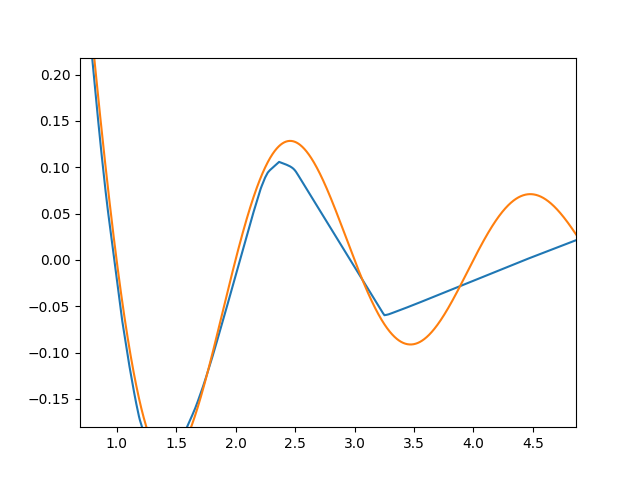

/tmp/ipykernel_384672/3577642923.py:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda x: np.sin(np.pi*x)/(np.pi*x)


In [30]:
%matplotlib notebook
plt.plot(inp, res)
plt.plot(inp, f(inp))

In [ ]:
x = np.random.uniform(0, 5)